<a href="https://colab.research.google.com/github/helmypram/helmypram-EDA-students_dropout_academic_success/blob/main/students_dropout_academic_success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
adilshamim8_predict_students_dropout_and_academic_success_path = kagglehub.dataset_download('adilshamim8/predict-students-dropout-and-academic-success')

print('Data source import complete.')


Data source import complete.


In [2]:
# Load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success/students_dropout_academic_success.csv')

# Melihat 5 baris pertama
df.head()



,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Statistik deskriptif
print(df.describe())

       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                

In [4]:
# Cek missing values
print(df.isnull().sum())

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

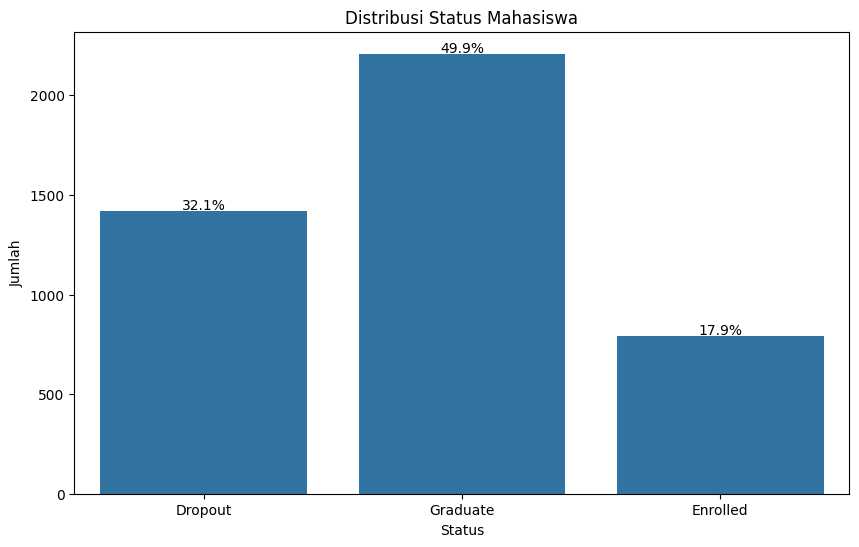

In [5]:
 #Distribusi Target (Dropout vs Graduate vs Enrolled
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="target", order=["Dropout", "Graduate", "Enrolled"])

# Hitung total data
total = len(df)

# Tambahkan persentase di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # Posisi tengah bar
        y=height + 5,                      # Jarak vertikal dari bar
        s=f"{height/total*100:.1f}%",      # Format persentase
        ha="center"                        # Posisi horizontal text
    )

plt.title("Distribusi Status Mahasiswa")
plt.xlabel("Status")
plt.ylabel("Jumlah")
plt.show()

Text(0.5, 1.0, 'Distribusi Usia Mahasiswa saat Pendaftaran')

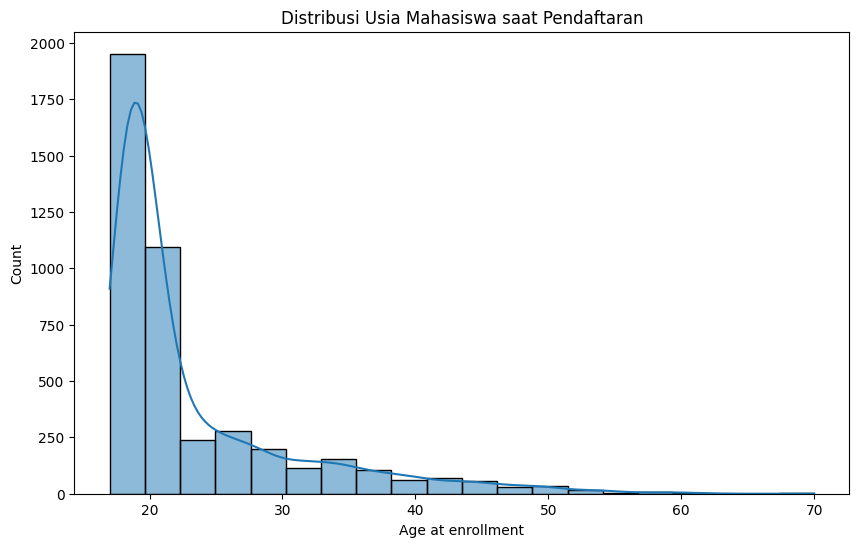

In [6]:
#Analisis Demografi
plt.figure(figsize=(10, 6))
sns.histplot(df["Age at enrollment"], bins=20, kde=True)
plt.title("Distribusi Usia Mahasiswa saat Pendaftaran")

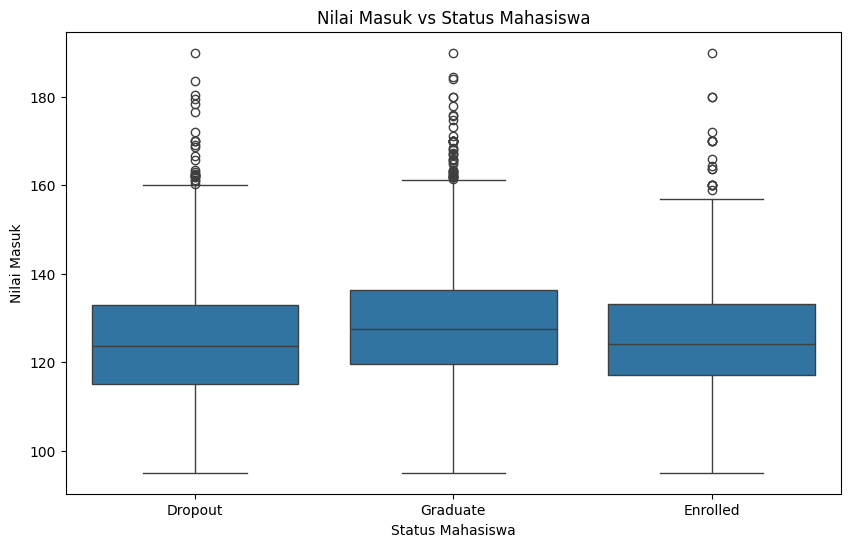

In [7]:
#Faktor akademi (nilai masuk)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="target", y="Admission grade")
plt.title("Nilai Masuk vs Status Mahasiswa")
plt.xlabel("Status Mahasiswa")
plt.ylabel("Nilai Masuk")
plt.show()


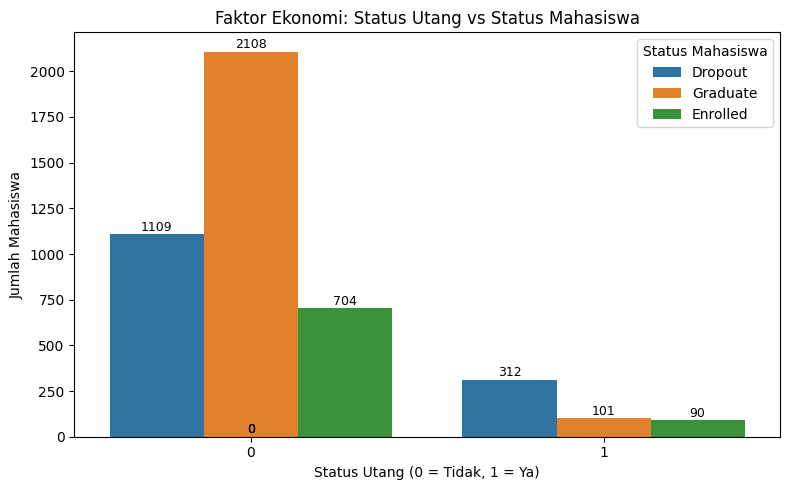

In [8]:
#Faktor Ekonomi
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Debtor", hue="target")
plt.title("Faktor Ekonomi: Status Utang vs Status Mahasiswa")
plt.xlabel("Status Utang (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Mahasiswa")

# Tambahkan label frekuensi
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black',
                       xytext=(0, 5), textcoords='offset points')

plt.legend(title='Status Mahasiswa')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Penerima Beasiswa vs Status Mahasiswa')

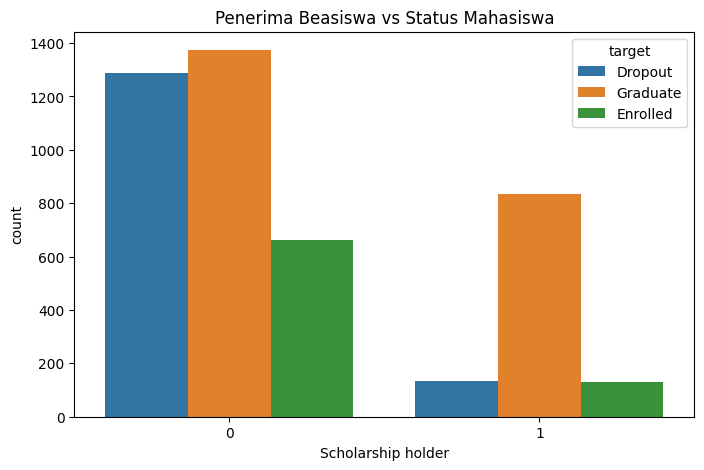

In [9]:
#Status beasiswa
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Scholarship holder", hue="target")
plt.title("Penerima Beasiswa vs Status Mahasiswa")

Text(0.5, 1.0, 'Persentase Kelulusan Mata Kuliah Semester 1 vs Status Mahasiswa')

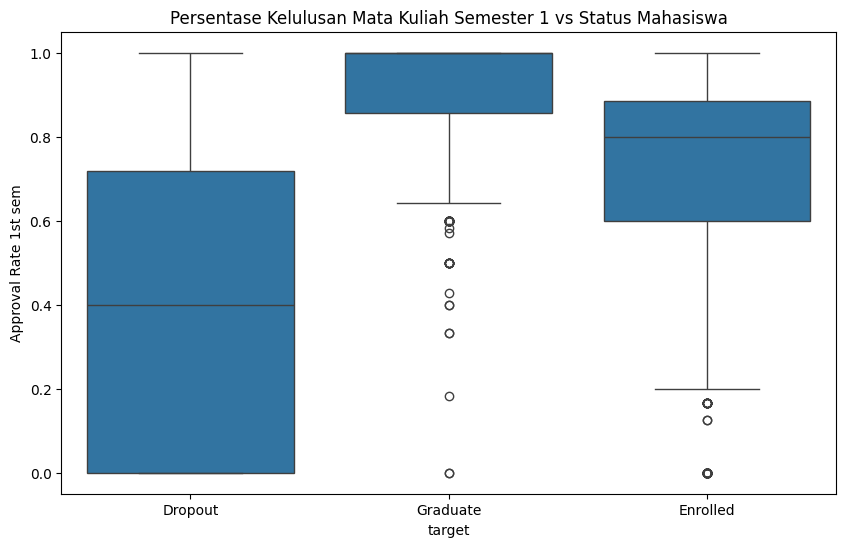

In [10]:
df["Approval Rate 1st sem"] = df["Curricular units 1st sem (approved)"] / df["Curricular units 1st sem (enrolled)"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="target", y="Approval Rate 1st sem")
plt.title("Persentase Kelulusan Mata Kuliah Semester 1 vs Status Mahasiswa")